In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as pyplot

In [2]:
!pip show pandas

Name: pandas
Version: 1.4.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: d:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages
Requires: numpy, python-dateutil, pytz
Required-by: statsmodels, seaborn


In [3]:
!pip install --upgrade pandas==1.4.2

In [4]:
diff = pd.read_csv('./diff.csv')
diff.shape

(1, 2)

In [5]:
diff

,Unnamed: 0,0
0,0,-0.090274


In [6]:
diff.columns

Index(['Unnamed: 0', '0'], dtype='object')

In [7]:
diff = diff.drop(columns=['Unnamed: 0'])
diff

,0
0,-0.090274


In [8]:
rdf = pd.read_csv('./rdf.csv')
rdf.shape

(64, 2)

In [9]:
rdf

,Unnamed: 0,0
0,0,0.000016
1,1,0.115081
2,2,0.178390
3,3,0.614581
4,4,0.001223
...,...,...
59,59,0.042850
60,60,0.047824
61,61,0.083834
62,62,0.002245


In [10]:
rdf = rdf.drop(columns=['Unnamed: 0'])
rdf

,0
0,0.000016
1,0.115081
2,0.178390
3,0.614581
4,0.001223
...,...
59,0.042850
60,0.047824
61,0.083834
62,0.002245


In [11]:
rdf.iloc[:, 0].apply(lambda x: 0 if x > 0.01 else 1)

0     1
1     0
2     0
3     0
4     1
     ..
59    0
60    0
61    0
62    1
63    0
Name: 0, Length: 64, dtype: int64

In [12]:
diff_rdf = pd.concat([diff.T.reset_index(), rdf], axis=1).drop(columns=['index'])
diff_rdf

,0,0
0,-0.090274,0.000016
1,NaN,0.115081
2,NaN,0.178390
3,NaN,0.614581
4,NaN,0.001223
...,...,...
59,NaN,0.042850
60,NaN,0.047824
61,NaN,0.083834
62,NaN,0.002245


In [13]:
norm = matplotlib.colors.Normalize(-1, 1)
colors = [[norm(-1.0), "cyan"],
        [norm(-0.6), "lightblue"],
        [norm(0.0), "black"],
        [norm(0.6), "lightyellow"],
        [norm(1.0), "yellow"]]

custom_color_map = LinearSegmentedColormap.from_list(
    "",
    colors=colors,
)

In [14]:
np.array(diff_rdf.iloc[:, 0]).reshape(64, -1).T

array([[-0.0902738,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan]])

<AxesSubplot:>

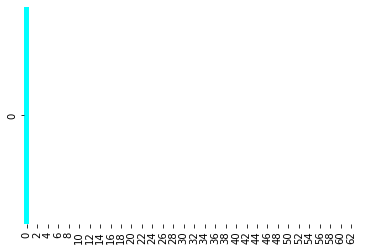

In [15]:
sns.heatmap(
    data=np.array(diff_rdf.iloc[:, 0]).reshape(64, -1).T,
    vmin=0,
    vmax=1.0,
    cbar=False,
    cmap=custom_color_map
)

### Filter by pvalue

which means put 0 when pvalue > 0.01

In [16]:
diff_rdf

,0,0
0,-0.090274,0.000016
1,NaN,0.115081
2,NaN,0.178390
3,NaN,0.614581
4,NaN,0.001223
...,...,...
59,NaN,0.042850
60,NaN,0.047824
61,NaN,0.083834
62,NaN,0.002245


In [17]:
f = diff_rdf

In [18]:
for i in range(len(f.iloc[:, 0])):
    if f.iloc[i, 1] > 0.01:
        f.iloc[i, 0] = 0.5

In [19]:
f

,0,0
0,-0.090274,0.000016
1,0.500000,0.115081
2,0.500000,0.178390
3,0.500000,0.614581
4,NaN,0.001223
...,...,...
59,0.500000,0.042850
60,0.500000,0.047824
61,0.500000,0.083834
62,NaN,0.002245


<AxesSubplot:>

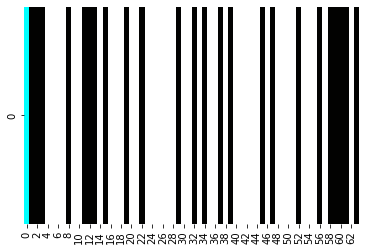

In [20]:
sns.heatmap(
    data=np.array(f.iloc[:, 0]).reshape(64, -1).T,
    vmin=0,
    vmax=1.0,
    cbar=False,
    cmap=custom_color_map
)

## Samples

We are taking this example for the category *United States*

In [58]:
sample = pd.read_csv("./sample.csv") # A random sample belonging to the category we're taking the example of
sample = sample.drop(columns='Unnamed: 0')
sample

,category,input,true,pred,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,neuron_11,neuron_12,neuron_13,neuron_14,neuron_15,neuron_16
0,['http://dbpedia.org/resource/United_States'],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,1.529219,0.876424,1.369729,-1.059959,-0.539351,-0.841103,-0.711532,-1.07275,-0.74689,-1.937051,0.599291,-0.841957,1.17754,0.931433,0.776959,-1.029904


In [59]:
data_1 = pd.read_csv('data_1.csv') # The activation for not a category
data_1 = data_1.drop(columns='Unnamed: 0')
data_1

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,neuron_11,neuron_12,neuron_13,neuron_14,neuron_15,neuron_16
0,-0.055622,-0.057293,-0.057292,0.058816,0.045854,0.050967,0.050121,0.059194,0.051427,0.030108,-0.04577,0.053857,-0.056786,-0.055678,-0.051753,0.057172


In [60]:
diff = pd.read_csv('diff.csv') # The original diff between in and out the category
diff = diff.drop(columns='Unnamed: 0')
diff

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.373237,0.384448,0.384438,-0.394668,-0.307689,-0.342,-0.336322,-0.397201,-0.345086,-0.202029,0.307125,-0.36139,0.381044,0.373612,0.347276,-0.383637


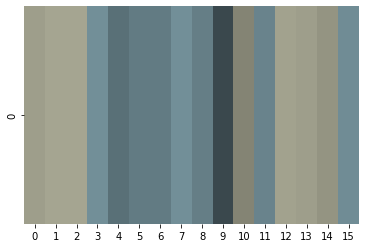

In [61]:
# The regular heatmap
ax = sns.heatmap(
    data=diff,
    vmin=-1.0,
    vmax=1.0,
    cbar=False,
    cmap=custom_color_map
)

In [62]:
# Taking only the activation columns for our sample
activations_cols = [col for col in sample.columns if "neuron" in col]
sample = sample.loc[:, sample.columns.isin(activations_cols)]
sample

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,neuron_11,neuron_12,neuron_13,neuron_14,neuron_15,neuron_16
0,1.529219,0.876424,1.369729,-1.059959,-0.539351,-0.841103,-0.711532,-1.07275,-0.74689,-1.937051,0.599291,-0.841957,1.17754,0.931433,0.776959,-1.029904


In [63]:
# Computing the difference between the sample and out of the category our sample belongs of
diff_sample = np.array(sample) - np.array(data_1.T[0])
diff_sample.shape

(1, 16)

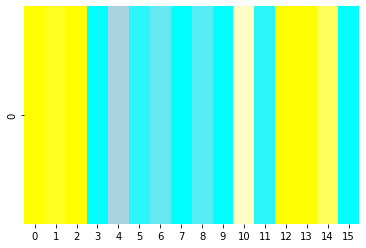

In [64]:
ax = sns.heatmap(
    data=diff_sample,
    vmin=-1.0,
    vmax=1.0,
    cbar=False,
    cmap=custom_color_map
) # The heatmap of the difference of the sample